In [13]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt
from matplotlib import cm

In [16]:
from util import get_connection

def read_table(database: str, table: str) -> DataFrame:
    '''return the contents of table from database as a pandas data frame'''
    query = f'SELECT * FROM {table}'
    return pd.read_sql(query, get_connection(database))

# The data here is spread across two tables, so we'll read it into a couple dataframes
# and join it together. Since we already have a primary key from the database,
# we can use that as the index into the dataframe.
def get_iris_data():
    measurements = read_table('iris_db', 'measurements')
    species = read_table('iris_db', 'species')
    return (measurements
            .merge(species, on='species_id')
            .drop(columns='species_id')
            .set_index('measurement_id'))

iris = get_iris_data()

print('Shape: ', iris.shape)
print(iris.dtypes)
iris.head()

Shape:  (150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species_name     object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species_name
measurement_id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


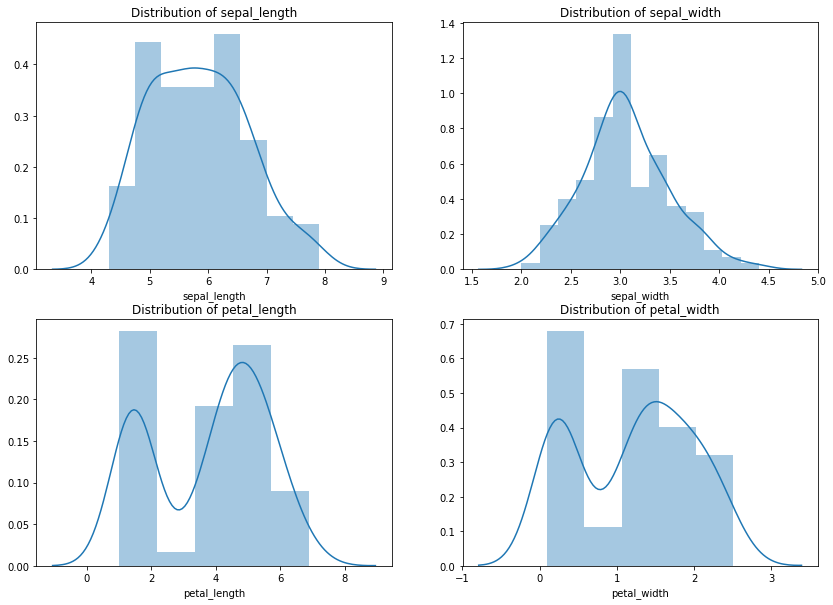

In [21]:
# What does the distribution of petal lengths look like?
# Let's actually look at all of the numeric features at once

plt.figure(figsize=(14, 10))

for i, col in enumerate(iris.drop(columns='species_name')):
    plot_no = i + 1
    plt.subplot(2, 2, plot_no)
    sns.distplot(iris[col])
    plt.title('Distribution of ' + col)


Text(0.5, 1.0, 'Petal Width vs Petal Length (r = 0.96)')

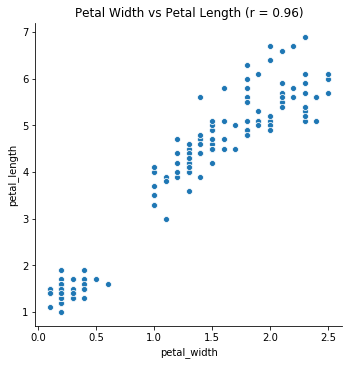

In [24]:
r = iris[['petal_length', 'petal_width']].corr().iloc[0, 1]

sns.relplot(data=iris, y='petal_length', x='petal_width')
plt.title('Petal Width vs Petal Length (r = {:.2})'.format(r))

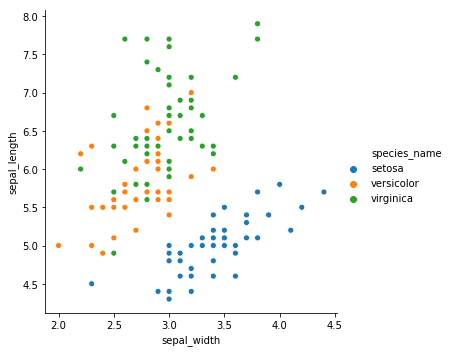

In [26]:
sns.relplot(data=iris, y='sepal_length', x='sepal_width', hue='species_name')

While it does look like there are distinct clusters around the sepal length and width, it might be better to use other features.

In [30]:
# One way we could determine which features are best to predict species
# is to find the features where the mean values for each species are the
# most different

iris.groupby('species_name').mean().std()

sepal_length    0.795061
sepal_width     0.336822
petal_length    2.090700
petal_width     0.896735
dtype: float64

Since petal length and petal width have the largest "breadth" in their means, we might start by using these to predict the species.

           x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579


<Figure size 864x576 with 0 Axes>

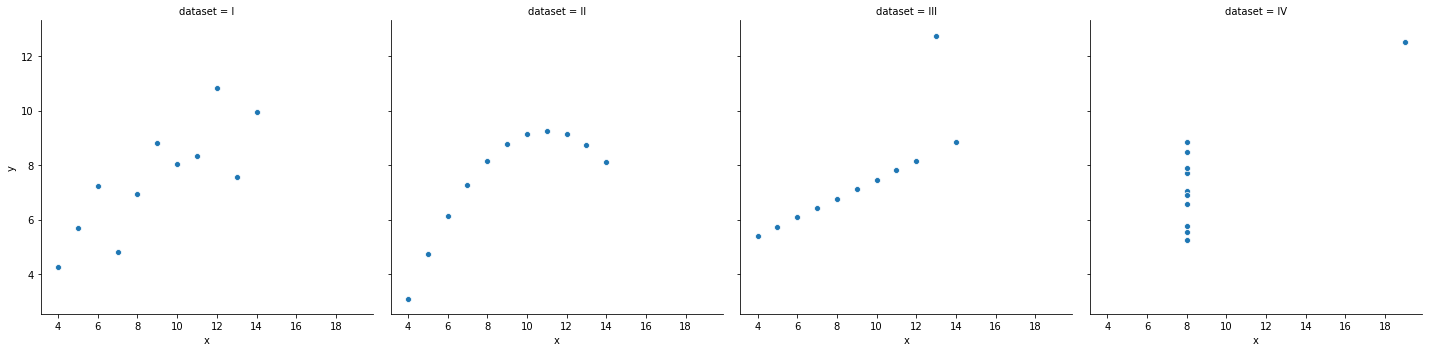

In [31]:
anscombe = sns.load_dataset('anscombe')

print(anscombe.groupby('dataset').agg(['mean', 'std']))

plt.figure(figsize=(12, 8))
sns.relplot(data=anscombe, col='dataset', x='x', y='y')

All three data sets have the same mean and standard deviation, but look radically different when visualized.

Always visualize your data!

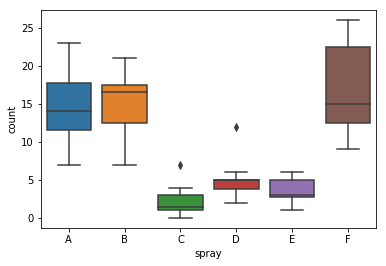

In [17]:
sprays = data('InsectSprays')

# sns.violinplot(data=sprays, x='spray', y='count')
sns.boxplot(data=sprays, x='spray', y='count')

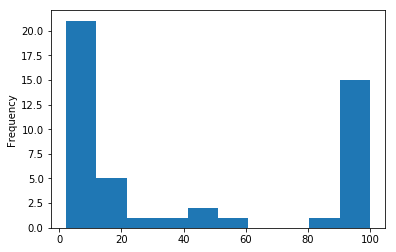

In [32]:
swiss = data('swiss')

# normalize the column names
swiss.columns = [col.lower() for col in swiss]

# let's justify that we should make a feature for whether or not a province is catholic
swiss.catholic.plot.hist()

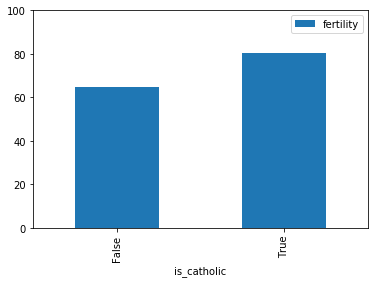

In [34]:
swiss['is_catholic'] = swiss.catholic > 80

swiss[['fertility', 'is_catholic']].groupby('is_catholic').mean().plot.bar(ylim=(0, 100))

Feature correlations with fertility
education          -0.663789
examination        -0.645883
agriculture         0.353079
infant.mortality    0.416556
catholic            0.463685
is_catholic         0.605023
fertility           1.000000
Name: fertility, dtype: float64


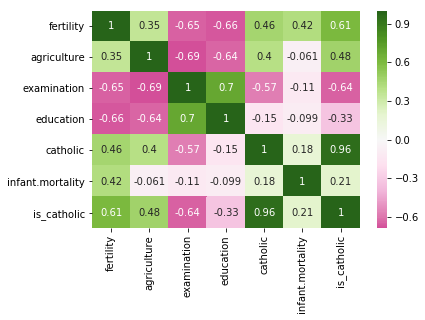

In [39]:
# What correlates the most with fertility?

print('Feature correlations with fertility')
print(swiss.corr().fertility.sort_values())

sns.heatmap(swiss.corr(), annot=True, center=0, cmap=cm.PiYG)

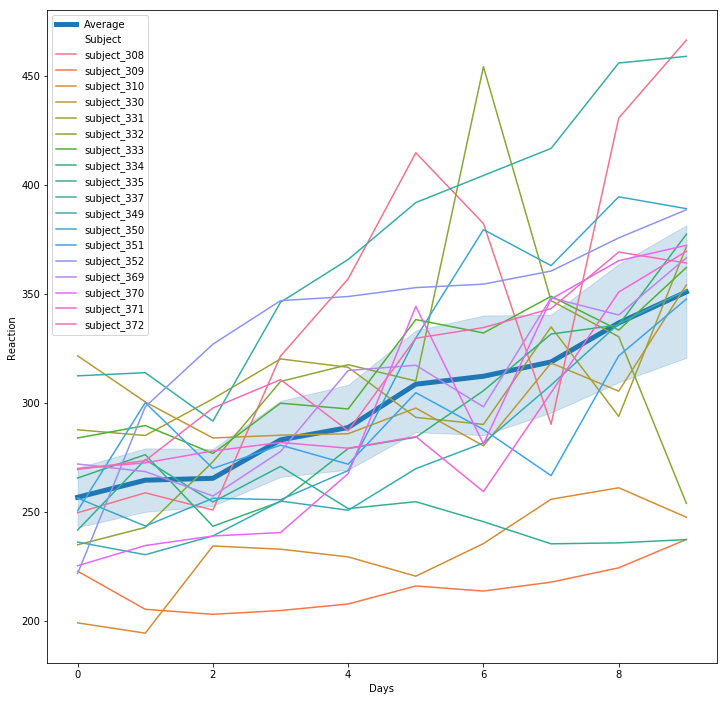

In [50]:
plt.figure(figsize=(12, 12))

sleep = data('sleepstudy')

sleep.Subject = 'subject_' + sleep.Subject.astype('str')

sns.lineplot(data=sleep, y='Reaction', x='Days', linewidth=5, label='Average')
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject')